In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
chosen_vars =['pub_rec_bankruptcies',
 'pub_rec',
 'num_accts_ever_120_pd',
 'initial_list_status',
 'purpose',
 'title',
 'tot_coll_amt',
 'home_ownership',
 'mths_since_last_record',
 'inq_last_6mths',
 'verification_status',
 'num_actv_bc_tl',
 'mort_acc',
 'num_bc_sats',
 'num_rev_tl_bal_gt_0',
 'num_tl_op_past_12m',
 'num_actv_rev_tl',
 'num_op_rev_tl',
 'open_acc',
 'num_sats',
 'num_bc_tl',
 'issue_d',
 'emp_length',
 'fico_range_low',
 'fico_range_high',
 'num_il_tl',
 'num_rev_accts',
 'term',
 'acc_open_past_24mths',
 'addr_state',
 'total_il_high_credit_limit',
 'loan_amnt',
 'earliest_cr_line',
 'mo_sin_old_il_acct',
 'total_bal_ex_mort',
 'zip_code',
 'total_bc_limit',
 'revol_util',
 'revol_bal',
 'bc_open_to_buy',
 'mo_sin_old_rev_tl_op',
 'installment',
 'annual_inc',
 'tot_hi_cred_lim',
 'avg_cur_bal',
 'grade',
 'dti',
 'int_rate',
 'sub_grade']

In [7]:
non_numerical_columns = ['verification_status_joint',
 'addr_state',
 'application_type',
 'verification_status',
 'debt_settlement_flag',
 'settlement_status',
 'hardship_status',
 'term',
 'grade',
 'initial_list_status',
 'hardship_loan_status',
 'purpose',
 'hardship_reason',
 'zip_code',
 'sub_grade',
 'emp_length',
 'title',
 'home_ownership']

In [8]:
train = pd.read_csv('train_2014.csv', low_memory=False)
test = pd.read_csv('test_2014.csv', low_memory=False)
final = pd.read_csv('final_2014.csv', low_memory=False)
files = [train, test, final]

In [9]:
non_numerical_columns = list(set(non_numerical_columns)-
                             set(['hardship_flag', 'hardship_type', 'pymnt_plan']))

In [10]:
pctstr_cols = ['int_rate', 'revol_util']
datestr_cols = ['issue_d','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',\
                'settlement_date','payment_plan_start_date','hardship_end_date',\
               'debt_settlement_flag_date','hardship_start_date','sec_app_earliest_cr_line']
def pcent_to_float(df, col):
    return df[df[col].notnull()][col].apply(lambda x: (str(x)[:-1])).astype('float16')
def date_to_int(df, col):
    return ((pd.to_datetime(df[df[col].notnull()][col]) - pd.to_datetime(df[df[col].notnull()][col]).min())/ (10**11)).astype('int64').astype('int32')

In [11]:
remove_cols = ['url', 'emp_title', 'id', 'Unnamed: 0', 'id', 'Unnamed: 0','member_id']

In [12]:
for file in files:
    for col in pctstr_cols:
        file[col] = pcent_to_float(file, col)
    for col in datestr_cols:
        file[col] = date_to_int(file, col)
    file.drop(remove_cols, axis = 1, inplace=True)

In [13]:
le = LabelEncoder()

In [14]:
for file in files:
    for col in non_numerical_columns:
        le.fit(file[col].astype('str'))
        file[col] = le.transform(file[col].astype('str'))

## Filling NAs:

In [15]:
train.drop(set(train.columns) - set(chosen_vars) - set(['loan_status']), inplace=True, axis=1)
test.drop(set(test.columns) - set(chosen_vars) - set(['loan_status']), inplace=True, axis=1)
final.drop(set(final.columns) - set(chosen_vars) - set(['loan_status']), inplace=True, axis=1)

In [16]:
train.drop(34703, inplace=True)

In [17]:
train['revol_util'] = train['revol_util'].apply(lambda x: float(x))
test['revol_util'] = test['revol_util'].apply(lambda x: float(x))
final['revol_util'] = final['revol_util'].apply(lambda x: float(x))

In [18]:
train['avg_cur_bal'].fillna((train['avg_cur_bal'].mean()), inplace=True)
train['revol_util'].fillna(train['revol_util'].mean(), inplace=True)
train['bc_open_to_buy'].fillna(-1, inplace=True)
train['mths_since_last_record'].fillna(240, inplace=True)
train['mo_sin_old_il_acct'].fillna((train['mo_sin_old_il_acct'].mean()), inplace=True)


test['avg_cur_bal'].fillna((train['avg_cur_bal'].mean()), inplace=True)
test['revol_util'].fillna(train['revol_util'].mean(), inplace=True)
test['bc_open_to_buy'].fillna(-1, inplace=True)
test['mths_since_last_record'].fillna(240, inplace=True)
test['mo_sin_old_il_acct'].fillna((train['mo_sin_old_il_acct'].mean()), inplace=True)


final['avg_cur_bal'].fillna((train['avg_cur_bal'].mean()), inplace=True)
final['revol_util'].fillna(train['revol_util'].mean(), inplace=True)
final['bc_open_to_buy'].fillna(-1, inplace=True)
final['mths_since_last_record'].fillna(240, inplace=True)
final['mo_sin_old_il_acct'].fillna((train['mo_sin_old_il_acct'].mean()), inplace=True)

In [19]:
train.count()

loan_amnt                     141377
term                          141377
int_rate                      141377
installment                   141377
grade                         141377
sub_grade                     141377
emp_length                    141377
home_ownership                141377
annual_inc                    141377
verification_status           141377
issue_d                       141377
loan_status                   141377
purpose                       141377
title                         141377
zip_code                      141377
addr_state                    141377
dti                           141377
earliest_cr_line              141377
fico_range_low                141377
fico_range_high               141377
inq_last_6mths                141377
mths_since_last_record        141377
open_acc                      141377
pub_rec                       141377
revol_bal                     141377
revol_util                    141377
initial_list_status           141377
t

In [20]:
y_train = train.loan_status
y_test = test.loan_status
y_final = final.loan_status
X_train = train.drop('loan_status', axis=1)
X_test = test.drop('loan_status', axis=1)
X_final = final.drop('loan_status', axis=1)

In [26]:
X_train.drop(set(X_train.columns) - set(chosen_vars), inplace=True, axis=1)
X_test.drop(set(X_test.columns) - set(chosen_vars), inplace=True, axis=1)
X_final.drop(set(X_final.columns) - set(chosen_vars), inplace=True, axis=1)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBRegressor
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV

In [30]:
train_dm = xgb.DMatrix(X_train.values, y_train, feature_names=X_train.columns)
test_dm = xgb.DMatrix(X_test.values, y_test, feature_names=X_test.columns)

In [64]:
a_param = {'seed':1, 'silent':1, 'objective':'binary:logistic','eval_metric': 'rmse'}
parta_boost = xgb.train(params=a_param,dtrain=train_dm)
parta_cv = xgb.cv(a_param, train_dm, 25, seed=0,metrics={'rmse'})

In [65]:
parta_cv['test-auc-mean'].idxmax()
n_estimators = parta_cv['test-rmse-mean'].idxmean()

KeyError: 'test-auc-mean'

In [35]:
parta_boost = xgb.train(params=a_param,dtrain=train_dm, num_boost_round=20)

In [36]:
parta_prob = parta_boost.predict(test_dm)
parta_yhat = np.where(parta_prob<0.5, 0,1)
parta_MCE = np.mean(y_test!= parta_yhat)


In [41]:
1-parta_MCE

0.8250222806943088

In [74]:
xgb_1 = XGBRegressor(objective='binary:logistic', verbose=0,
                      learning_rate=0.2, n_estimators=n_estimators).fit(X_train, y_train)

In [75]:
GS_CV = GridSearchCV(estimator=xgb_1,param_grid = {'max_depth':[9,10],'min_child_weight':[3,4,5,6]},
                     scoring='roc_auc',verbose=0, cv=5).fit(X_train, y_train)

In [78]:
GS_CV.best_params_

{'max_depth': 9, 'min_child_weight': 6}

In [92]:
xgb_1 = XGBRegressor(objective='binary:logistic', verbose=0,
                      learning_rate=0.2, max_depth=5, min_child_weight =4, n_estimators=n_estimators).fit(X_train, y_train)

In [95]:
GS_CV = GridSearchCV(estimator=xgb_1,param_grid = {'gamma':[0.30,0.35,0.40,0.45,0.5]},
                     scoring='roc_auc',verbose=0, cv=5).fit(X_train, y_train)

In [105]:
y_hat_xgb_1 = xgb_1.predict(X_test)

In [109]:
xgb_1 = XGBRegressor(objective='binary:logistic', verbose=0,
                      learning_rate=0.2, max_depth=5, min_child_weight =4, n_estimators=n_estimators, gamma=0.35).fit(X_train, y_train)

In [101]:
GS_CV.best_params_

{'gamma': 0.35}

In [102]:
import xgboost as xgb
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [107]:
parta_prob = xgb_1.predict(X_test)
parta_yhat = np.where(parta_prob<0.5, 0,1)
parta_MCE = np.mean(y_test!= parta_yhat)


In [111]:
1-parta_MCE

0.8256376522514111

In [112]:
xgb_1 = XGBRegressor(objective='binary:logistic', verbose=0,
                      learning_rate=0.2, max_depth=5, min_child_weight =4, n_estimators=42, gamma=0).fit(X_train, y_train)

In [115]:
GS_CV = GridSearchCV(estimator=xgb_1,param_grid = {'subsample':[0.85,0.9,0.95,1.0],'colsample_bytree':[0.6,0.7,0.8,0.9,1]},
                     scoring='roc_auc',verbose=0, cv=5).fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
GS_CV.best_params_

In [117]:
tree=xgb.cv({'objective':'binary:logistic', \
                    'eta': 0.01,'max_depth': 5,'scale_pos_weight':1,'gamma':0.0,\
                    'min_child_weight':4,'colsample_bytree': 1, 'subsample': 0.65,}, train_dm, num_boost_round=1200, metrics={'auc'},seed=1)

In [120]:
tree['test-auc-mean'].idxmax()

1164

In [123]:
xgb_1 = XGBRegressor(objective='binary:logistic', verbose=0,
                      learning_rate=0.01, max_depth=5, min_child_weight =4, n_estimators=1164, subsample=0.65, gamma=0).fit(X_final, y_final)

In [126]:
parta_prob = xgb_1.predict(X_final)
parta_yhat = np.where(parta_prob<0.5, 0,1)
parta_MCE = np.mean(y_final!= parta_yhat)
1-parta_MCE

0.8290152142084155

Text(0, 0.5, 'TPR')

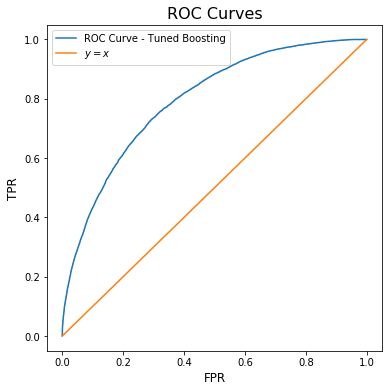

In [128]:
partb_pred = xgb_1.predict(X_final)
partb_yhat = np.where(partb_pred<0.5,0,1)
partb_MCE = np.mean(y_final!= partb_yhat)
pb_fpr, pb_tpr, pb_thresholds = metrics.roc_curve(y_final, partb_pred)
partb_AUC = metrics.auc(pb_fpr, pb_tpr)

fig = plt.figure(figsize=[6,6])
xy = np.linspace(0, 1, 10)
axs = fig.subplots(1,1)
sns.lineplot(pb_fpr,pb_tpr, ax=axs, label = 'ROC Curve - Tuned Boosting')

axs.plot(xy,xy, label='$y = x$')
axs.legend()
axs.set_title('ROC Curves', size = 16)
axs.set_xlabel('FPR', size = 12)
axs.set_ylabel('TPR', size = 12)